# Performances between Groups



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
primaryData = pd.read_csv(r'./data/mouse_dictionary.csv')
primaryData['Mouse ID'] = primaryData['Mouse ID'].astype(str)
primaryData.dtypes

Mouse ID                 object
Genotype                 object
Gender                   object
DOB                      object
Maze Configuration       object
Pharmacological Group    object
Experimental Group       object
Experimental Status      object
dtype: object

In [36]:
# load experimental data
experimentalData = pd.read_csv(r'./data/experimental_data.csv')
experimentalData = experimentalData[experimentalData['Date']>='2020-01-01']
print(experimentalData[['Date','Start Time','End Time']].isnull().sum())

#experimentalData.dropna(subset=['Start Time','End Time'])
experimentalData.fillna(0)

Date          0
Start Time    7
End Time      7
dtype: int64


,Mouse ID,Date,Weight,Baited Arms Retrieved,Reference Memory Errors,Working Memory Errors,Other Notes,Start Time,End Time,Video Length,...,Distance,Center,ArmA,ArmB,ArmC,ArmD,ArmE,ArmF,ArmG,ArmH
442,282,2020-01-01,22,0,20,32,0,2020-01-01 10:56:55,2020-01-01 11:06:55,0:10:00,...,21976.567308,0.127251,0.092354,0.077351,0.079851,0.251834,0.226161,0.016948,0.075406,0.054179
443,286,2020-01-01,24,0,22,28,0,2020-01-01 12:53:09,2020-01-01 13:02:10,0:09:01,...,23247.547933,0.112399,0.055121,0.089401,0.084284,0.037734,0.108638,0.327086,0.145385,0.041433
444,255,2020-01-01,27,0,19,25,0,2020-01-01 14:40:03,2020-01-01 14:49:17,0:09:14,...,19706.210634,0.094680,0.088969,0.072378,0.033724,0.107604,0.130448,0.259633,0.182387,0.032101
445,261,2020-01-01,28,0,26,46,0,2020-01-01 13:40:21,2020-01-01 13:49:55,0:09:34,...,27863.110858,0.216202,0.078223,0.096806,0.122706,0.142509,0.096632,0.101278,0.076829,0.071661
446,260,2020-01-01,28,1,23,27,0,2020-01-01 13:18:12,2020-01-01 13:28:02,0:09:50,...,16997.318591,0.117993,0.168230,0.081657,0.080018,0.156476,0.221349,0.049051,0.050746,0.077588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,184,2020-03-14,21,4,6,5,0,2020-03-14 16:21:51,2020-03-14 16:24:46,0:02:55,...,6655.527613,0.075561,0.047012,0.123144,0.122764,0.180434,0.098592,0.016939,0.174343,0.161591
1062,228,2020-03-14,24,4,6,4,0,2020-03-14 18:49:16,2020-03-14 18:50:44,0:01:28,...,6492.794653,0.151607,0.081285,0.136484,0.050662,0.246125,0.031758,0.081664,0.145180,0.075614
1063,178,2020-03-14,29,4,4,2,0,2020-03-14 15:30:11,2020-03-14 15:32:29,0:02:18,...,4653.022679,0.058795,0.051566,0.085301,0.112530,0.128916,0.000000,0.347711,0.102169,0.113494
1064,181,2020-03-14,25,4,6,6,0,2020-03-14 18:39:59,2020-03-14 18:42:15,0:02:16,...,6789.697856,0.136319,0.086882,0.018355,0.036221,0.138277,0.000000,0.258688,0.099853,0.226383


In [85]:
def str_to_seconds(time_str:str):
    c = time_str.split(':')
    minute = int(c[1])
    second = int(c[2])
    return int(minute*60 + second)
for i in range(len(experimentalData['Video Length'])):
    if type(experimentalData.loc[i,'Video Length']) == str:
        experimentalData.loc[i,'Video Length'] = str_to_seconds(experimentalData.loc[i,'Video Length'])
    else:
        experimentalData.drop(experimentalData.index[i])

experimentalData

,Mouse ID,Date,Weight,Baited Arms Retrieved,Reference Memory Errors,Working Memory Errors,Other Notes,Start Time,End Time,Video Length,...,Distance,Center,ArmA,ArmB,ArmC,ArmD,ArmE,ArmF,ArmG,ArmH
0,71,2020-01-01,25,1,29,53,NaN,2020-01-01 15:36:00,2020-01-01 15:46:00,600,...,31366.376863,0.180530,0.094627,0.126299,0.101295,0.118186,0.095016,0.057065,0.150414,0.079069
1,71,2020-01-02,24,4,12,11,NaN,2020-01-02 16:58:59,2020-01-02 17:04:06,307,...,11830.438316,0.094303,0.119154,0.126641,0.155182,0.059468,0.202713,0.082366,0.084102,0.076831
2,71,2020-01-05,24,4,14,22,NaN,2020-01-05 14:31:33,2020-01-05 14:39:53,500,...,18402.245643,0.081661,0.197587,0.125525,0.223252,0.088194,0.059663,0.123125,0.063796,0.038531
3,71,2020-01-09,26,4,12,12,NaN,2020-01-09 13:04:11,2020-01-09 13:12:01,470,...,12118.593142,0.058323,0.099404,0.206613,0.039166,0.236909,0.195048,0.007521,0.119696,0.038243
4,71,2020-01-12,24,4,6,2,NaN,2020-01-12 13:25:45,2020-01-12 13:28:31,166,...,5878.642581,0.052579,0.272527,0.135862,0.048766,0.043548,0.091712,0.031106,0.260084,0.064218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,286,2020-02-22,20,4,4,1,NaN,2020-02-22 13:09:36,2020-02-22 13:10:20,44,...,3342.531538,0.101746,0.290812,0.097950,0.138193,0.127563,0.047836,0.126044,0.069856,0.000000
610,286,2020-02-29,25,4,3,1,NaN,2020-02-29 16:39:39,2020-02-29 16:40:39,60,...,3283.921063,0.075774,0.164270,0.000000,0.158739,0.167588,0.040929,0.180863,0.212389,0.000000
611,286,2020-03-02,25,1,5,2,NaN,2020-03-02 16:33:49,2020-03-02 16:40:36,407,...,7396.998210,0.045965,0.017862,0.225809,0.191807,0.050553,0.101024,0.218189,0.048505,0.100533
612,286,2020-03-07,24,4,6,6,NaN,2020-03-07 16:38:41,2020-03-07 16:40:15,94,...,6159.613641,0.091584,0.024399,0.232673,0.149929,0.177511,0.000000,0.225248,0.044908,0.054455


In [86]:
# all mice under test
primaryData = primaryData[primaryData['Experimental Status']=='Testing']

In [87]:
# number of valid mice (testing)
allMice = list(pd.unique(primaryData['Mouse ID']))
print(allMice)
print("Total number of testing mice:", len(allMice))


['71', '99', '131', '170', '171', '172', '173', '174', '175', '177', '178', '181', '182', '184', '190', '193', '194', '196', '202', '203', '207', '210', '211', '221', '224', '225', '228', '230', '231', '232', '233', '234', '236', '238', '253', '254', '255', '256', '259', '260', '261', '264', '276', '282', '284', '285', '286']
Total number of testing mice: 47


In [99]:
experimentalData.to_csv(r'.\data\before.csv')

df_delete_first_seven_sessions = pd.DataFrame({})

for m in allMice:
    records = experimentalData[experimentalData['Mouse ID'] == int(m)]
    times = records.shape[0]
    if times <= 7:
        pass
    else:
        records.reset_index(drop=True,inplace=True)
        records = records[7:]
        df_delete_first_seven_sessions = pd.concat([df_delete_first_seven_sessions,records])

experimentalData = df_delete_first_seven_sessions
experimentalData.reset_index(drop=True,inplace=True)
experimentalData.to_csv(r'.\data\after.csv')

## Grouping

Genotype Groups:

1. Tg-SwDI + (--)

2. Tg-SwDI + (MAMP)

3. Th-Cre + (--)

4. Tg-SwDI+ x Th-Cre + (low dose)

5. Tg-SwDI+ x Th-Cre + (high dose)

In [100]:
class Group:

    # From Group object we can easily retrieve mice data in one group
    
    def __init__(self,primaryData,experimentalData,genotype,treatment):

        # initialize parameter: 
        #     primaryData: total primary mice data
        #     experimentalData: total experimental data
        #     genotype: group genotype
        #     treatment: group treatment
        # properties:
        #     name, genotype, treatment, members, size, groupPrimaryData, groupExperimentalData
        # methods: 
        #     group.info(self): display group infomation
        
        groupPrimaryData = primaryData[primaryData['Genotype']==genotype]
        groupPrimaryData = groupPrimaryData[groupPrimaryData['Pharmacological Group']==treatment]
        #groupPrimaryData = groupPrimaryData[groupPrimaryData['Treatment Group']==treatment]
        groupPrimaryData.reset_index(drop=True,inplace=True)
        
        self.name = genotype + '(' + treatment + ')'
        self.groupPrimaryData = groupPrimaryData
        self.genotype = genotype
        self.treatment = treatment
        self.members = list(groupPrimaryData['Mouse ID'])
        self.size = len(list(groupPrimaryData['Mouse ID']))
        
        def in_group(x):
            return str(x) in self.members
        groupExperimentalData = experimentalData[experimentalData['Mouse ID'].apply(in_group)]
        groupExperimentalData.reset_index(drop=True,inplace=True)
        self.groupExperimentalData = groupExperimentalData

        
    def info(self):
        print('---------------------------------')
        print('Genotype:',self.genotype,' | Treatment:',self.treatment)
        print('Members:',self.members)
        print('Size:',self.size)
        return


In [101]:
# Create instances for Group object
group1 = Group(primaryData,experimentalData,'Tg-SwDI','--')
group2 = Group(primaryData,experimentalData,'Tg-SwDI','MAMP')
group3 = Group(primaryData,experimentalData,'ThCre','--')
group4 = Group(primaryData,experimentalData,'Tg-SwDI x ThCre','Low Dose CNO')
group5 = Group(primaryData,experimentalData,'Tg-SwDI x ThCre','High Dose CNO')

# Do grouping and display group info
grouping = [group1,group2,group3,group4,group5]
group1.info()
group2.info()
group3.info()
group4.info()
group5.info()

# example: retrieve group1 primary data
group1.groupPrimaryData

---------------------------------
Genotype: Tg-SwDI  | Treatment: --
Members: ['170', '171', '172', '173', '174', '175', '224', '225', '231', '233']
Size: 10
---------------------------------
Genotype: Tg-SwDI  | Treatment: MAMP
Members: ['254', '255', '260', '261', '282', '284', '285', '286']
Size: 8
---------------------------------
Genotype: ThCre  | Treatment: --
Members: ['71', '99', '131', '190', '193', '194', '196', '202', '203', '207', '210', '211']
Size: 12
---------------------------------
Genotype: Tg-SwDI x ThCre  | Treatment: Low Dose CNO
Members: ['184', '236', '238', '253', '256', '259', '264', '276']
Size: 8
---------------------------------
Genotype: Tg-SwDI x ThCre  | Treatment: High Dose CNO
Members: ['177', '178', '181', '182', '221', '228', '230', '232', '234']
Size: 9


,Mouse ID,Genotype,Gender,DOB,Maze Configuration,Pharmacological Group,Experimental Group,Experimental Status
0,170,Tg-SwDI,M,8/2/2019,ABFG,--,Disease Control,Testing
1,171,Tg-SwDI,M,8/2/2019,ABFG,--,Disease Control,Testing
2,172,Tg-SwDI,F,8/2/2019,BCEG,--,Disease Control,Testing
3,173,Tg-SwDI,F,8/2/2019,BCEG,--,Disease Control,Testing
4,174,Tg-SwDI,F,8/2/2019,BCEG,--,Disease Control,Testing
5,175,Tg-SwDI,F,8/2/2019,BCEG,--,Disease Control,Testing
6,224,Tg-SwDI,M,8/24/2019,ABFG,--,Disease Control,Testing
7,225,Tg-SwDI,M,8/24/2019,ABFG,--,Disease Control,Testing
8,231,Tg-SwDI,F,8/24/2019,BCEG,--,Disease Control,Testing
9,233,Tg-SwDI,M,8/24/2019,ABFG,--,Disease Control,Testing


In [102]:
class Mouse:
    
    # From Mouse object we can easily retrieve individual mouse data
    
    def __init__(self, grouping, ID: str):

        # initialize parameter: 
        #     grouping: a list of Group objects
        #     ID: mouse id
        # properties:
        #     ID, category, primaryData, experimentalData
        # methods:
        #     mouse.get_age_wks(self,date): return age(wks) ceiled by certain date
        #     mouse.get_weekly_performance(self): return weekly performance (dataframe) of individual mouse 

        self.ID = ID
        for group in grouping:
            if self.ID in group.members:
                self.category = group.name
                self.primaryData = group.groupPrimaryData[group.groupPrimaryData['Mouse ID']==self.ID]
                experimentalData = group.groupExperimentalData[group.groupExperimentalData['Mouse ID']==int(self.ID)]
                experimentalData.reset_index(drop=True, inplace=True)
                self.experimentalData = experimentalData
    
    def get_age_wks(self,date):
        
        self.primaryData['Age(days)'] = np.empty_like(self.primaryData['Mouse ID'])
        today = pd.to_datetime(str(datetime.date.today()))
        
        for i in list(self.primaryData.index):
            dob = pd.to_datetime(str(self.primaryData['DOB'][i]))
            age_days = str(date - dob)[:-14]
            age_wks = math.ceil(int(age_days) / 7.0)
            
        return age_wks
    
    
    def get_weekly_performance(self):

        m_df = self.experimentalData[['Date','Weight','Baited Arms Retrieved','Reference Memory Errors','Working Memory Errors','Video Length']]
        m_df['Date'] = pd.to_datetime(m_df['Date'])

        bins_dt = pd.date_range('2020-01-01', freq='7D', periods=100)
        bins_str = bins_dt.astype(str).values

        labels = ['({}, {}]'.format(bins_str[i-1], bins_str[i]) for i in range(1, len(bins_str))]


        m_df['cat'] = pd.cut(m_df.Date.astype(np.int64)//10**9,
                           bins=bins_dt.astype(np.int64)//10**9,
                           labels=labels)
        m_df['cat'] = m_df['cat'].cat.remove_unused_categories()
        
        m_df['Age(wks)'] = np.empty_like(m_df['Date'])
        for i in range(len(m_df['Date'])):
            m_df.loc[i,'Age(wks)'] = int(self.get_age_wks(m_df.loc[i,'Date']))
        m_df['Age(wks)'] = m_df['Age(wks)'].astype(np.int64)
        
        m_df['Mouse ID'] = np.empty_like(m_df['Date'])
        for i in range(len(m_df['Date'])):
            m_df.loc[i,'Mouse ID'] = self.ID
        
        m_df['Retrieve Time'] = np.empty_like(m_df['Weight']) # type:int
        for i in range(len(m_df['Date'])):
            m_df.loc[i,'Retrieve Time'] = m_df.loc[i,'Video Length']
            
        m_df = m_df[['Date','Mouse ID','Weight','Age(wks)','Baited Arms Retrieved','Reference Memory Errors','Working Memory Errors','Retrieve Time','cat']]
        m_df.sort_values(by='Date',inplace=True)
        m_df.reset_index(drop=True,inplace=True)
        
        return m_df

##################################################################################################

def collect_weekly_performance(group=None):
    
    if group == None:
        # get weekly data for all mice
        m_ID = allMice[0]
        m = Mouse(grouping,m_ID)
        df = m.get_weekly_performance()
        
        for m_ID in allMice[1:]:

            m = Mouse(grouping,m_ID)
            df_append = m.get_weekly_performance()
            df = pd.concat([df,df_append],axis=0)
        
        df.sort_values(by='Age(wks)',inplace=True)
        return df
    
    else:
        # get weekly data for mice in one group
        m_ID = group.members[0]
        m = Mouse(grouping,m_ID)
        df = m.get_weekly_performance()
        
        for m_ID in group.members[1:]:
            
            m = Mouse(grouping,m_ID)
            df_append = m.get_weekly_performance()
            df = pd.concat([df,df_append],axis=0)

        df.sort_values(by='Age(wks)',inplace=True)
        return df

##################################################################################################

def get_weekly_mean(df):
    
    df_mean = df.groupby('Age(wks)').mean()
    df_mean.reset_index(drop=False,inplace=True)
    df_mean.sort_values(by='Age(wks)',inplace=True)
    df_mean.reset_index(drop=True,inplace=True)
    
    return df_mean

##################################################################################################

def plot_weekly_mean(df_mean,group,ax):
    
    weight_mean = df_mean['Weight']
    finished_mean = df_mean['Baited Arms Retrieved']
    rme_mean = df_mean['Reference Memory Errors']
    wme_mean =  df_mean['Working Memory Errors']
    time_mean = df_mean['Video Length']
    
    age_wks = sorted(df_mean['Age(wks)'])
    print(age_wks)
    
    l1, = plt.plot(age_wks,rme_mean,label='avg_RME')
    l2, = plt.plot(age_wks,wme_mean,label='avg_WME') 
    l3, = plt.plot(age_wks,time_mean,label='avg_Time')
    ax.legend()
    ax.set_title(group.name)
    ax.set_xlabel('Age(wks)')
    ax.set_ylabel('Errors')

###################################################################################################

def weekly_errorbar_wme(df,group,ax):

    wks = df['Age(wks)'].unique()
    age_wks = sorted(wks)

    ls_wme = []
    for wk in age_wks:
        wme = df[df['Age(wks)']==wk]['Working Memory Errors']
        ls_wme.append(wme)

    ax.boxplot(ls_wme,positions=age_wks, patch_artist=True, boxprops=dict(facecolor="C0"))

    ax.set_title(group.name)
    ax.set_xlabel('Age(wks)')
    ax.set_ylabel('Errors') 


def weekly_errorbar_rme(df,group,ax):

    wks = df['Age(wks)'].unique()
    age_wks = sorted(wks)

    ls_rme = []
    for wk in age_wks:
        rme = df[df['Age(wks)']==wk]['Reference Memory Errors']
        ls_rme.append(rme)

    ax.boxplot(ls_rme,positions=age_wks, patch_artist=True, boxprops=dict(facecolor="C2"))
    
    ax.set_title(group.name)
    ax.set_xlabel('Age(wks)')
    ax.set_ylabel('Errors') 

## Plot performance for individuals


In [103]:
m = Mouse(grouping,'232')
m.get_weekly_performance()

,Date,Mouse ID,Weight,Age(wks),Baited Arms Retrieved,Reference Memory Errors,Working Memory Errors,Retrieve Time,cat
0,2020-03-07,232,22,28,4,1,0,48,"(2020-03-04, 2020-03-11]"
1,2020-03-08,232,23,29,4,6,6,169,"(2020-03-04, 2020-03-11]"


    object
dtype: object
-----------mean-------------    Age(wks)  Weight  Baited Arms Retrieved  Reference Memory Errors  \
0        29    23.5                    4.0                      8.5   
1        30    24.0                    4.0                     10.0   

   Working Memory Errors  Retrieve Time  
0                    9.0          292.5  
1                    8.0          201.0  
D:\GitHub\MazeClerk\fig\testing_47_exclude_first_7\Tg-SwDI x ThCre(Low Dose CNO)\236.png
238
------------df-------------- Empty DataFrame
Columns: [Date, Mouse ID, Weight, Age(wks), Baited Arms Retrieved, Reference Memory Errors, Working Memory Errors, Retrieve Time, cat]
Index: []
Date                       datetime64[ns]
Mouse ID                           object
Weight                              int64
Age(wks)                            int64
Baited Arms Retrieved               int64
Reference Memory Errors             int64
Working Memory Errors               int64
Retrieve Time                

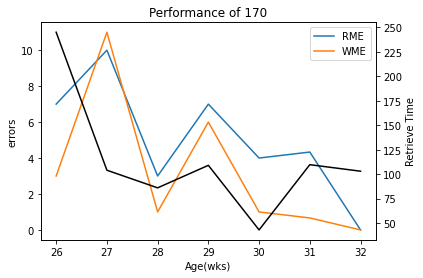

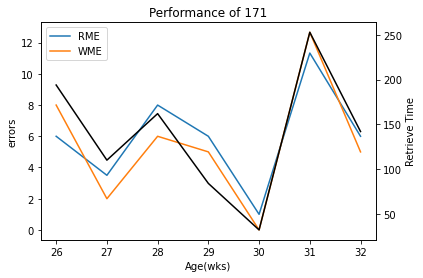

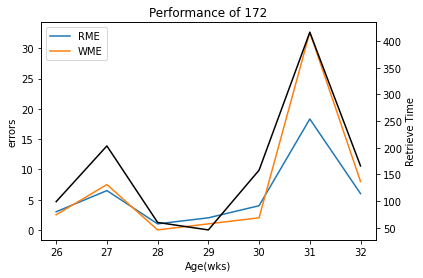

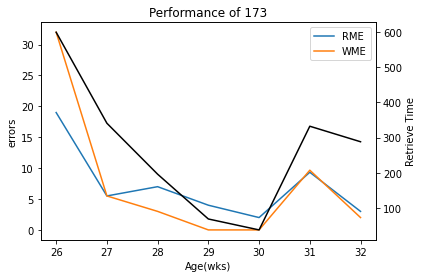

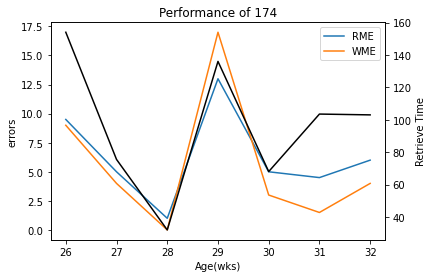

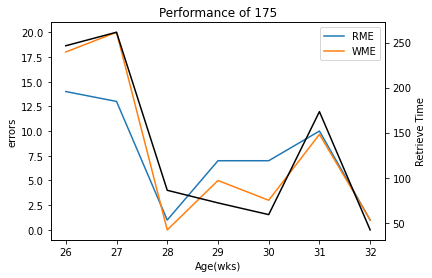

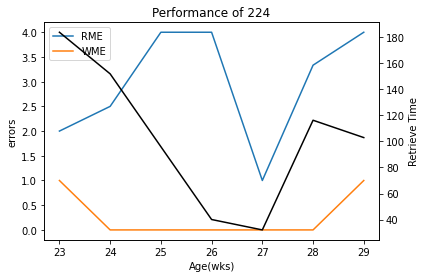

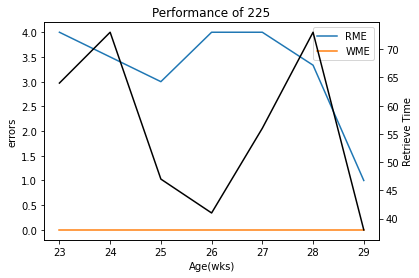

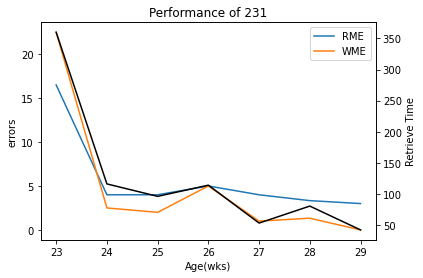

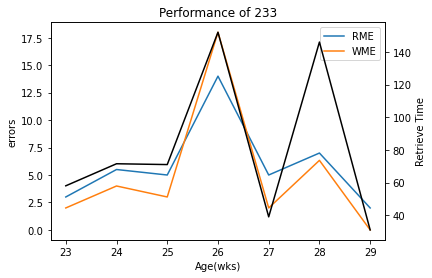

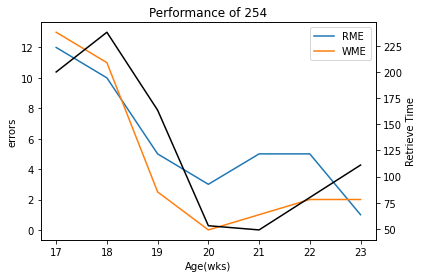

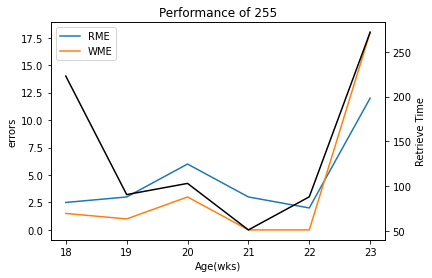

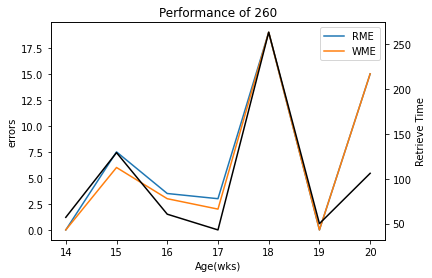

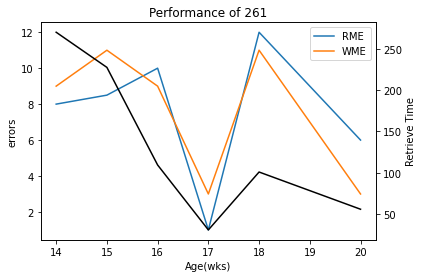

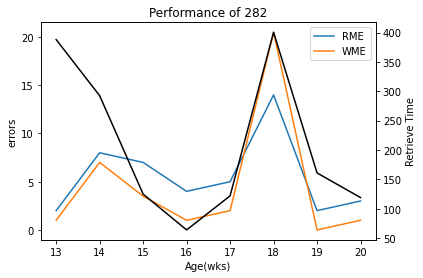

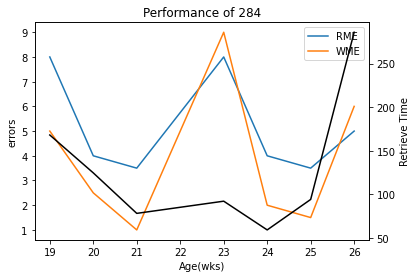

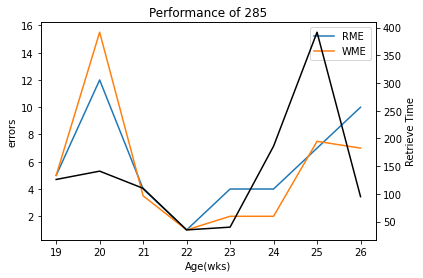

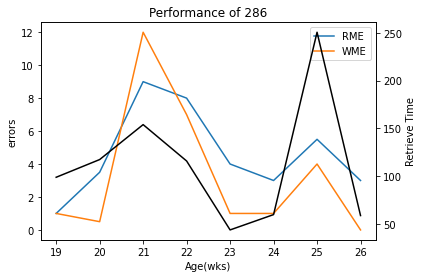

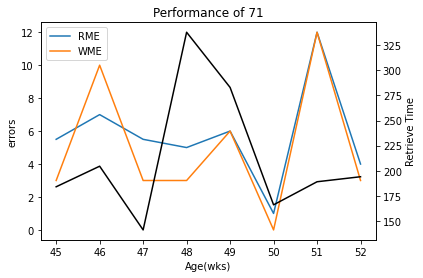

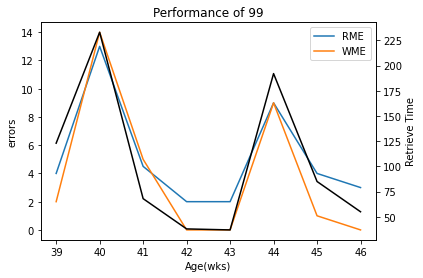

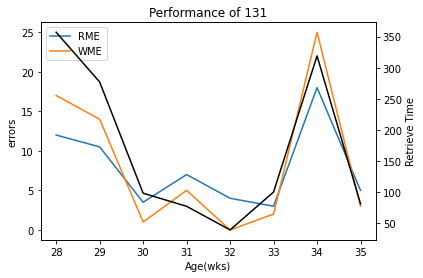

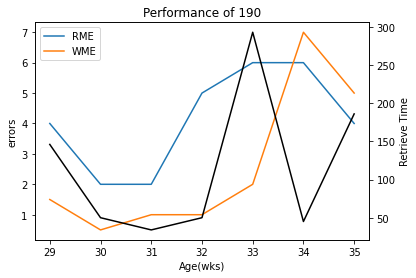

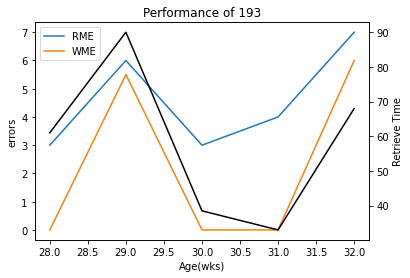

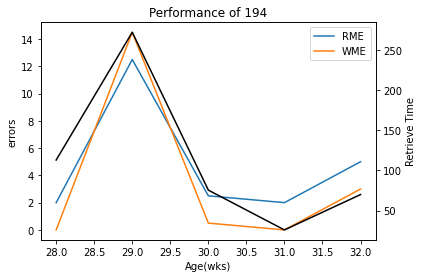

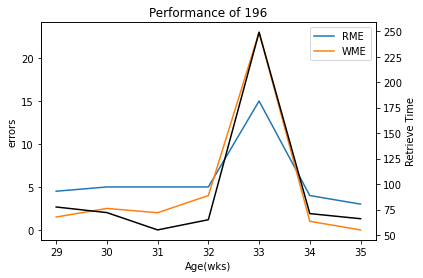

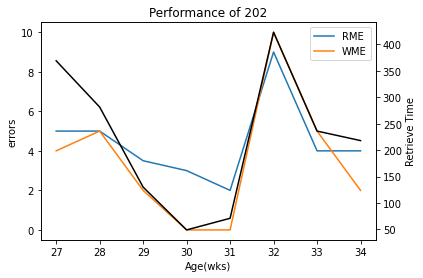

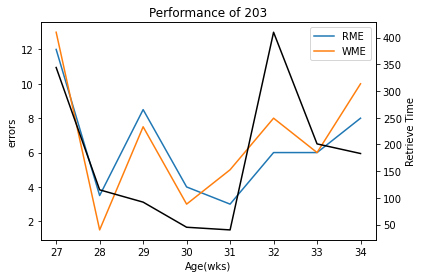

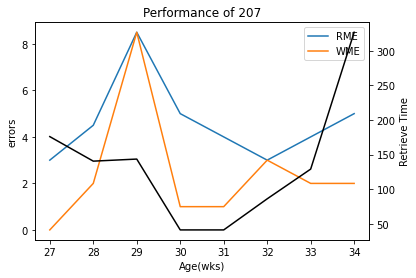

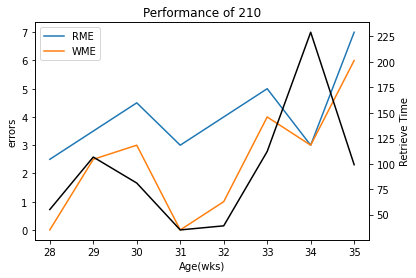

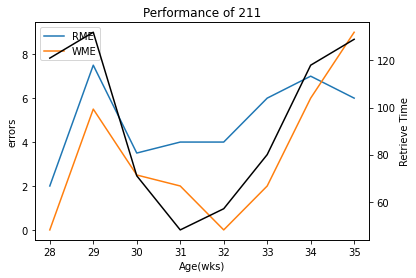

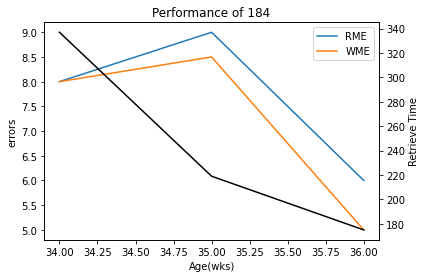

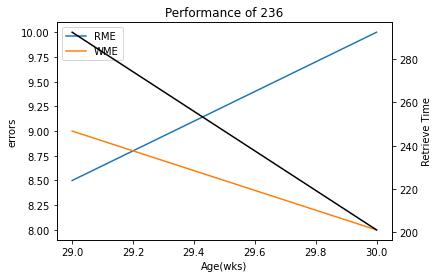

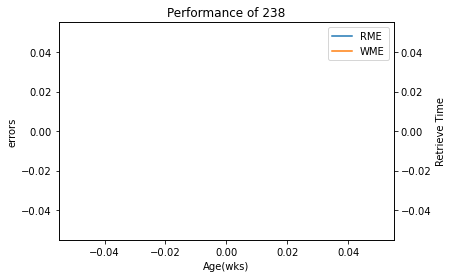

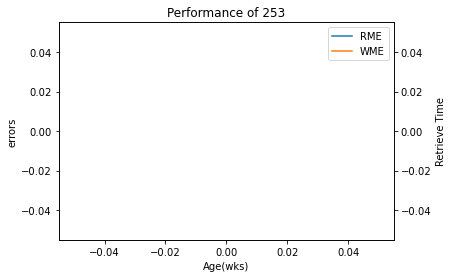

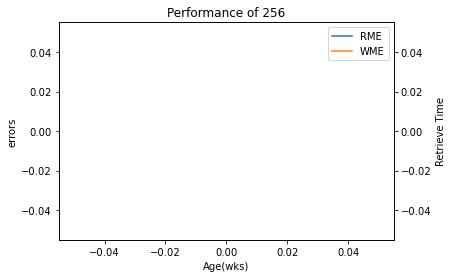

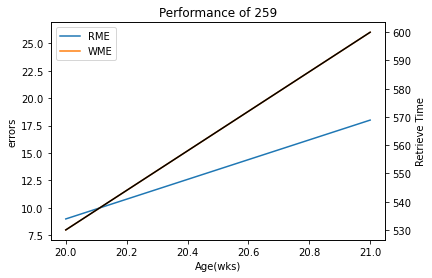

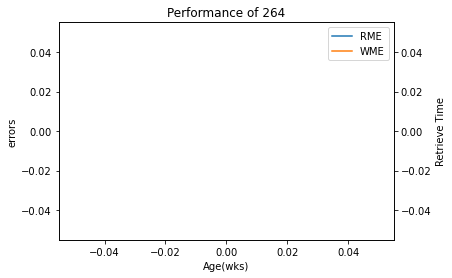

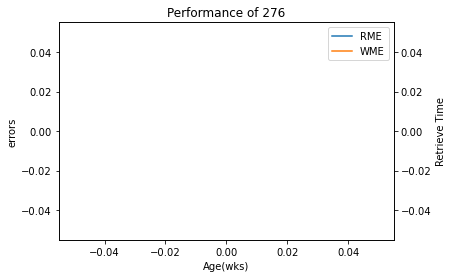

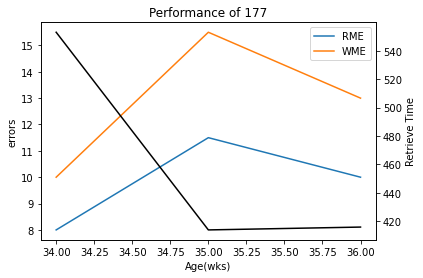

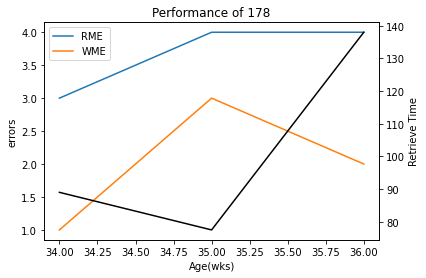

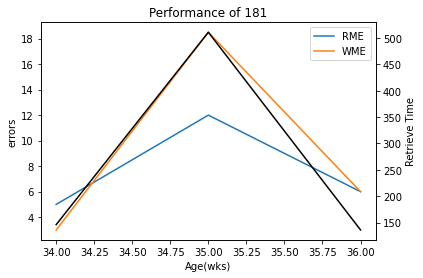

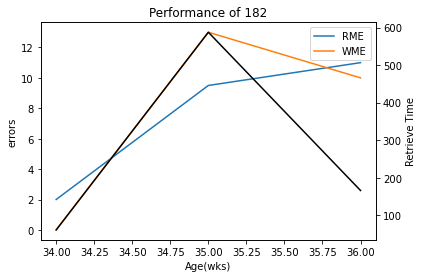

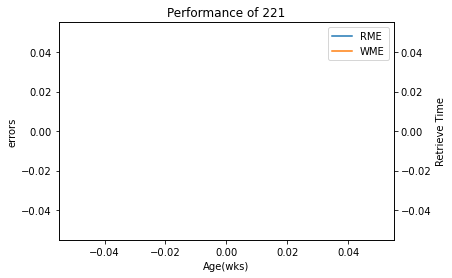

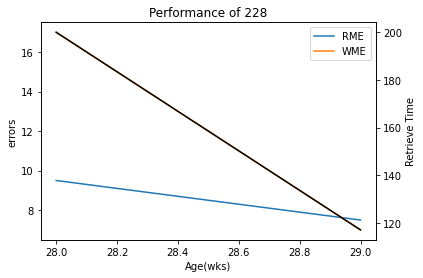

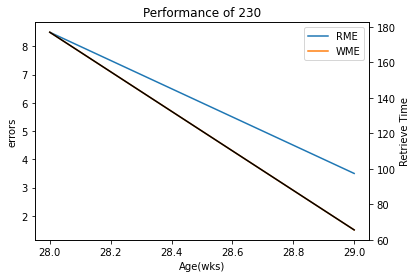

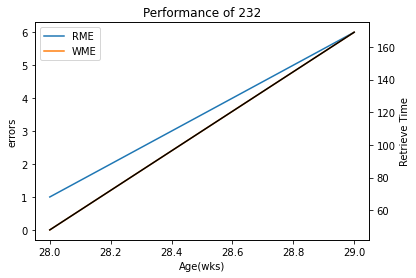

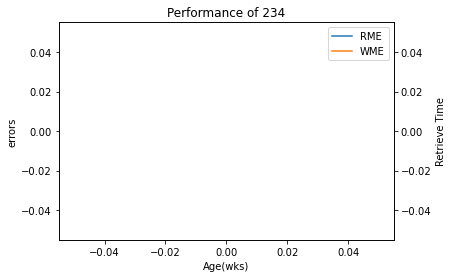

In [104]:
#figpath = r'D:\GitHub\MazeClerk\fig\individual_performance_Jan_1_Mar_14'
figpath = r'D:\GitHub\MazeClerk\fig\testing_47_exclude_first_7'
#for group in grouping:
for group in grouping:
    for m_ID in group.members:
        df = collect_weekly_performance(group)
        df.to_csv(r'.\data\group1.csv')
        df = df[df['Mouse ID']==m_ID]
        print(m_ID)
        print('------------df--------------',df)
        print(df.dtypes)
        df_mean = get_weekly_mean(df)
        print('-----------mean-------------',df_mean)
        
        # create figure and axis objects with subplots()
        fig,ax = plt.subplots()
        # make a plot
        l1, = ax.plot(df_mean['Age(wks)'],df_mean['Reference Memory Errors'],label='RME')
        l2, = ax.plot(df_mean['Age(wks)'],df_mean['Working Memory Errors'],label='WME')
        # set x-axis label
        ax.set_xlabel("Age(wks)")
        ax.set_ylabel('errors')
        plt.legend()
        # twin object for two different y-axis on the sample plot
        ax2 = ax.twinx()
        # make a plot with different y-axis using second axis object
        l3, = ax2.plot(df_mean['Age(wks)'],df_mean['Retrieve Time'],label='Time',color='k')
        ax2.set_ylabel("Retrieve Time")

        ax.set_title('Performance of '+ str(m_ID))
        savepath = figpath + '\\' + group.name + '\\' + str(m_ID) + '.png'
        print(savepath)
        plt.savefig(savepath)


## Plot for groups

[23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
[27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
[20, 21, 29, 30, 34, 35, 36]
[28, 29, 34, 35, 36]


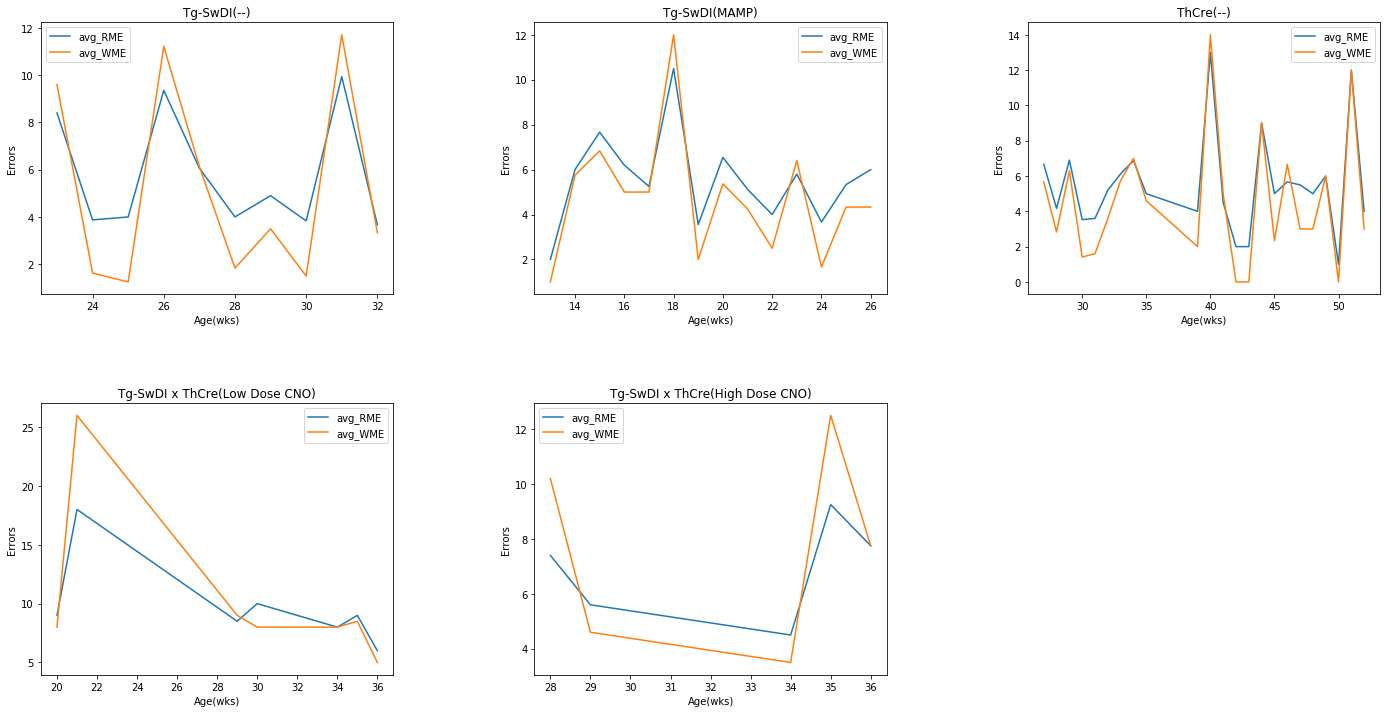

In [11]:
fig = plt.figure(figsize=(24,12))
i = 1

for group in grouping:
    
    df = collect_weekly_performance(group)
    df_mean = get_weekly_mean(df)
    
    ax = fig.add_subplot(2,3,i)
    plot_weekly_mean(df_mean,group,ax)

    i += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
plt.savefig(r'./fig/performance_snapshot_group_20200314.png')
plt.show()


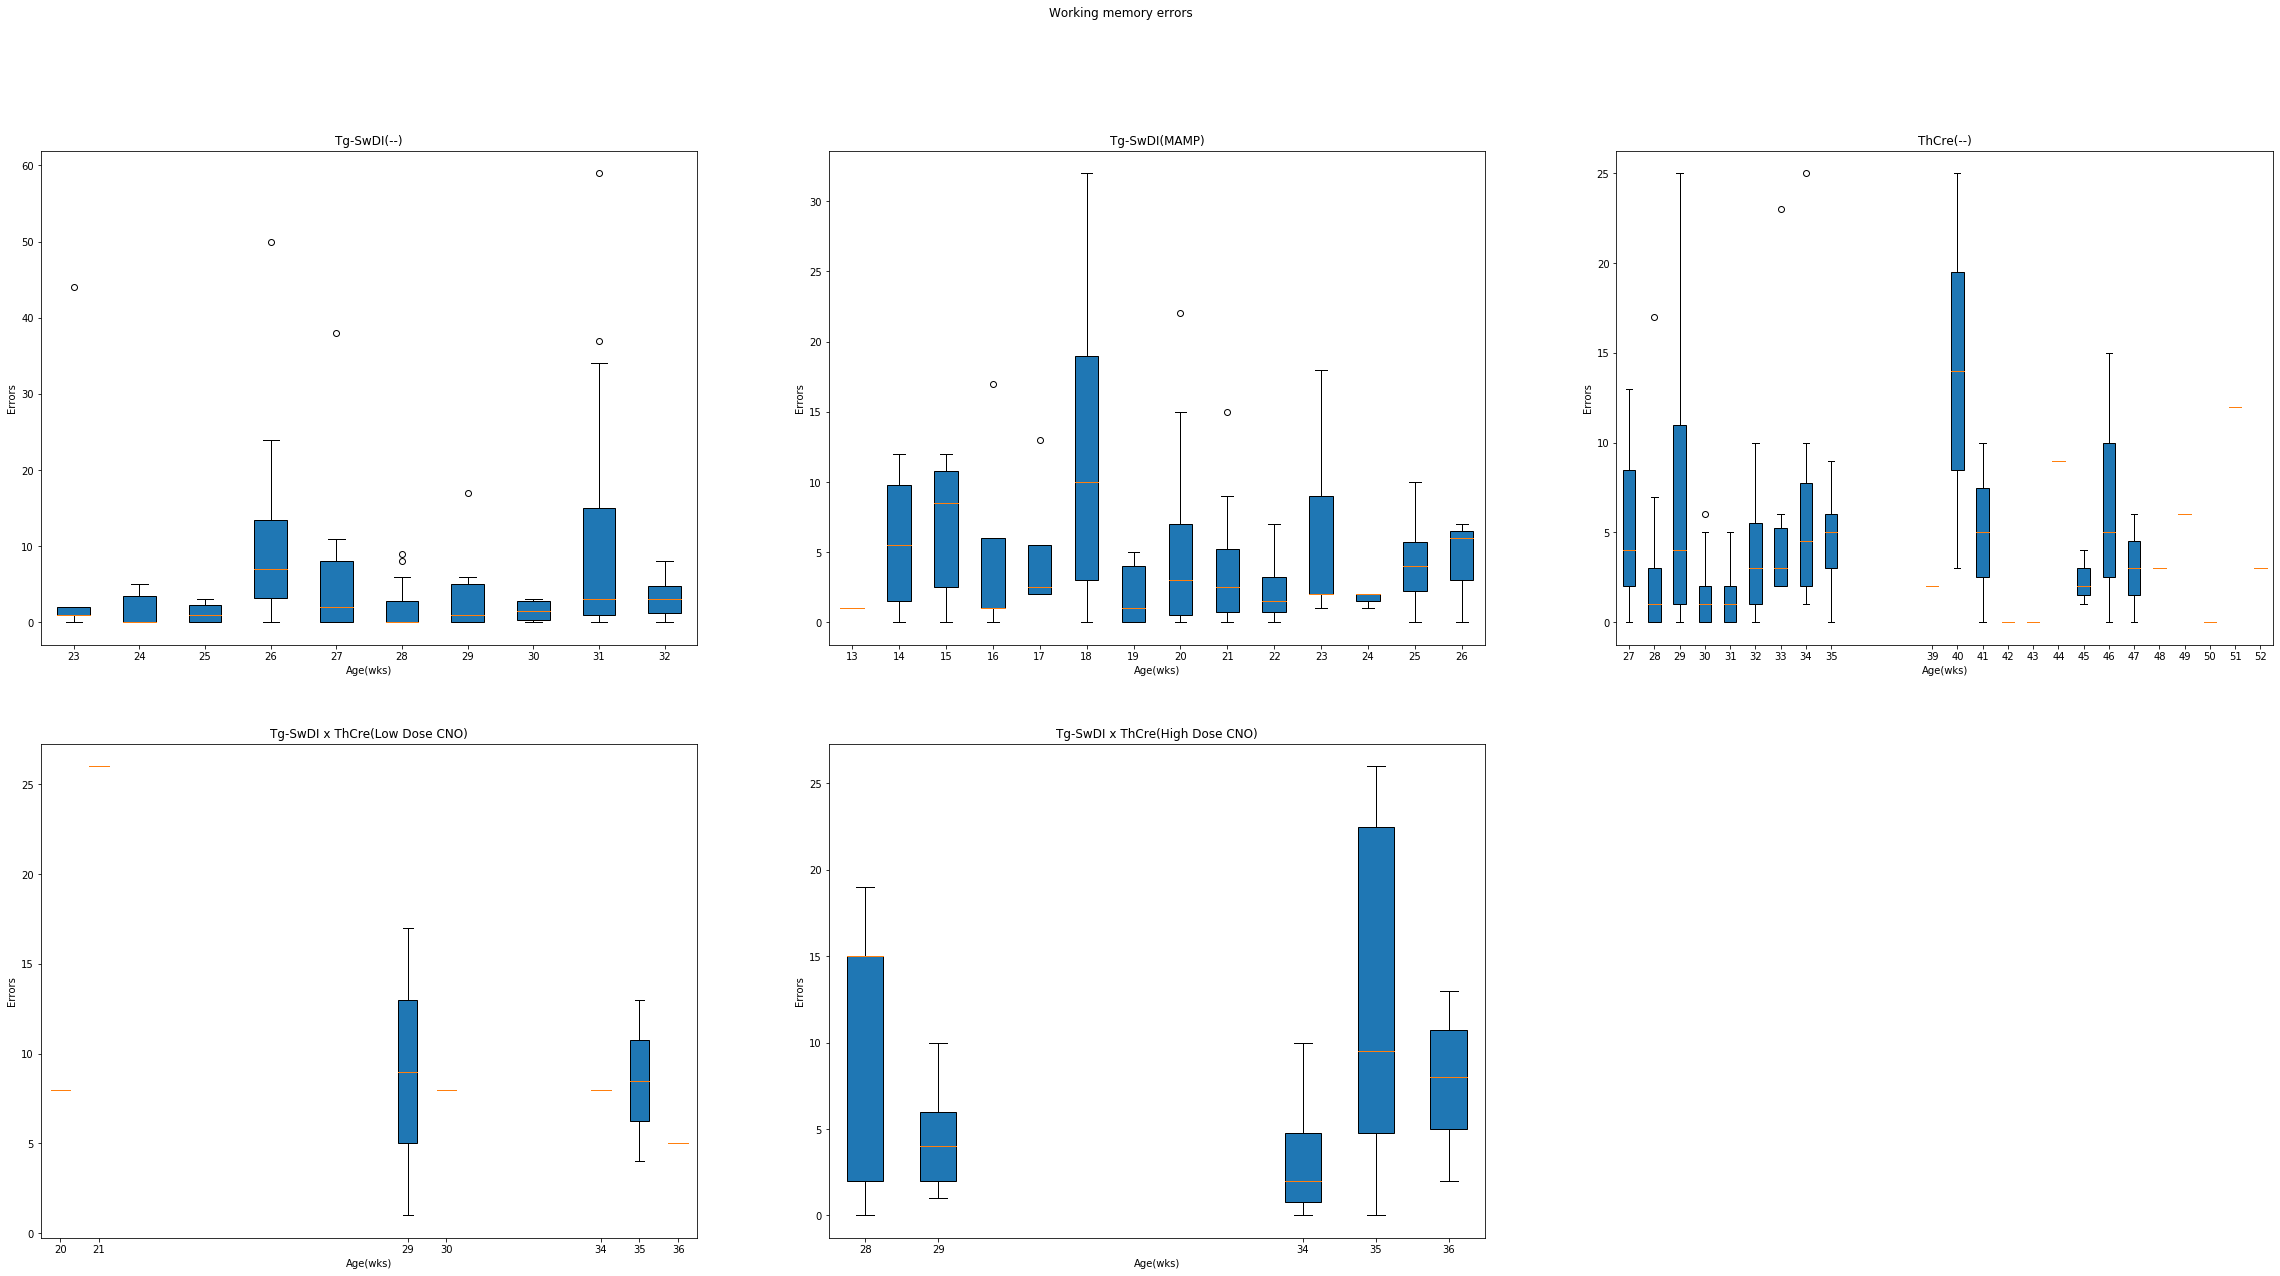

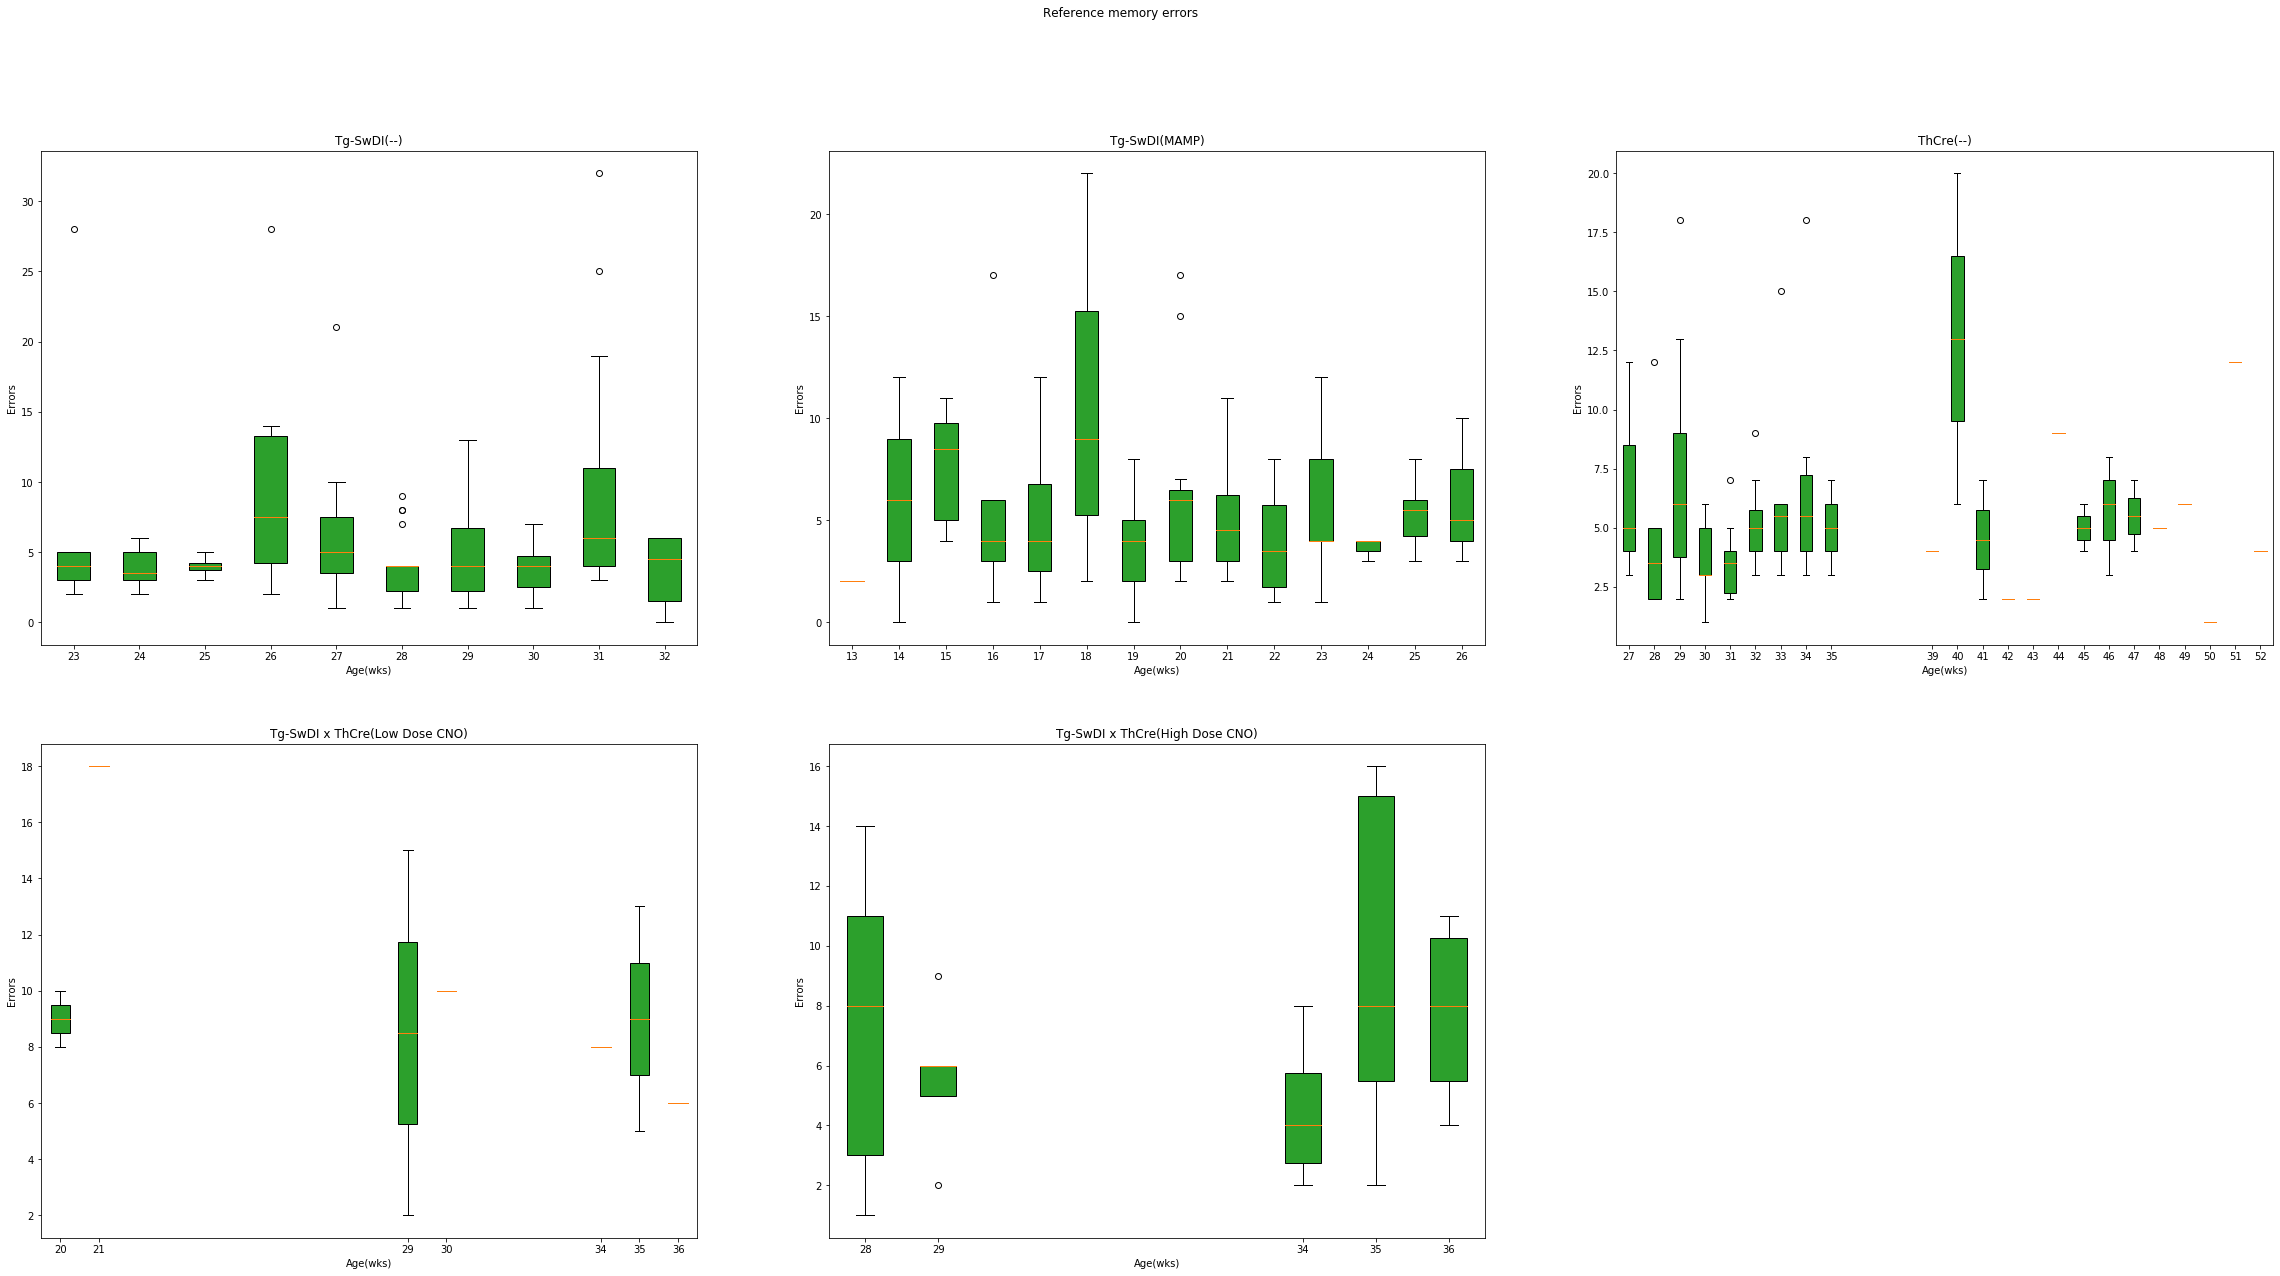

In [12]:
fig = plt.figure(figsize=(40,20))
i = 1

for group in grouping:
    
    df = collect_weekly_performance(group)
    #print(df['Age(wks)'].unique())
    df_mean = get_weekly_mean(df)
    
    ax = fig.add_subplot(2,3,i)
    #plot_weekly_mean(df_mean,group,ax)
    weekly_errorbar_wme(df,group,ax)

    i += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
fig.suptitle('Working memory errors')
plt.savefig(r'./fig/WME.png')
plt.show()

fig = plt.figure(figsize=(40,20))
i = 1

for group in grouping:
    
    df = collect_weekly_performance(group)
    #print(df['Age(wks)'].unique())
    df_mean = get_weekly_mean(df)
    
    ax = fig.add_subplot(2,3,i)
    #plot_weekly_mean(df_mean,group,ax)
    weekly_errorbar_rme(df,group,ax)

    i += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
fig.suptitle('Reference memory errors')
plt.savefig(r'./fig/RME.png')
plt.show()
